# Day 6: Data Visualization with Matplotlib & Seaborn

##  Load Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Netflix dataset
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Task 1: Matplotlib Basics

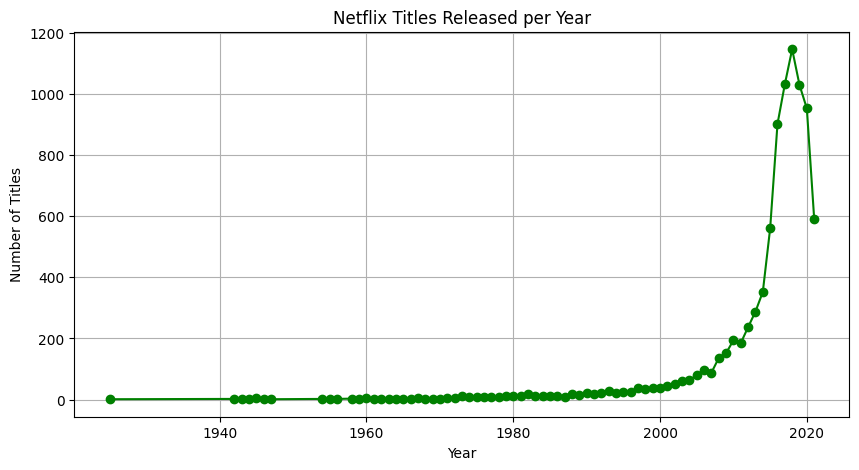

In [3]:

# Line plot: Number of releases per year
year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values, color='green', marker='o')
plt.title('Netflix Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.savefig("netflix_yearly_releases.png", dpi=300)
plt.show()


## Task 2: Customized Scatter Plot

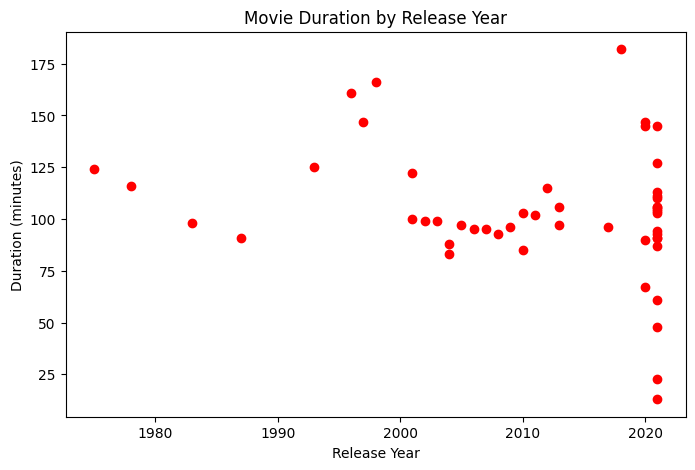

In [4]:

# Custom scatter using duration (converted to minutes if applicable)
plt.figure(figsize=(8,5))
sample = df[df['type'] == 'Movie'].dropna(subset=['duration']).head(50)
sample['minutes'] = sample['duration'].str.extract('(\d+)').astype(float)
plt.scatter(sample['release_year'], sample['minutes'], color='red')
plt.title('Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.savefig("duration_vs_year.png", dpi=300)
plt.show()


## Task 3: Seaborn Visualizations

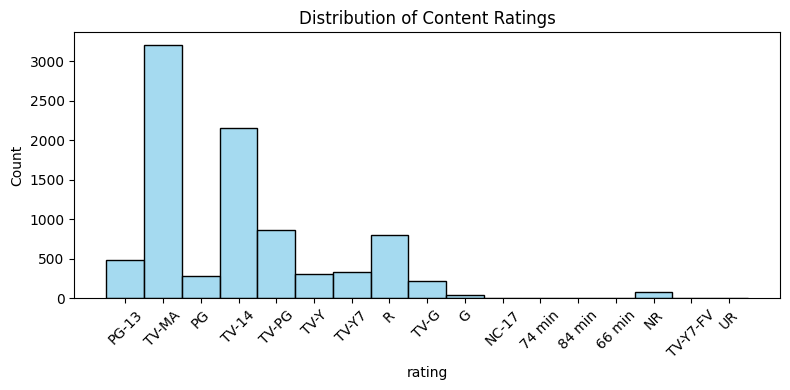

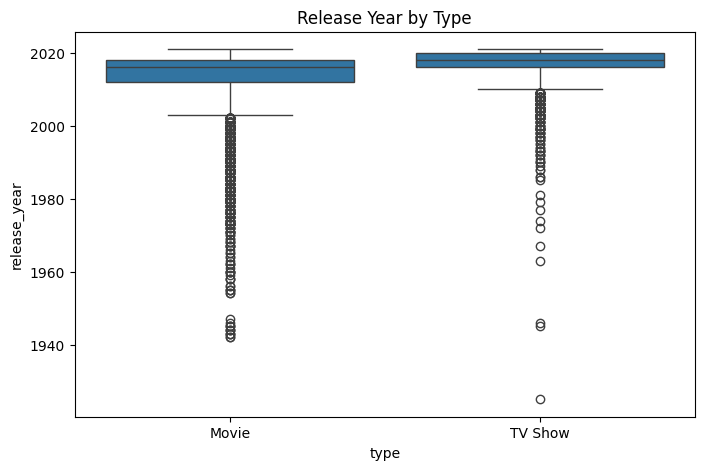

In [5]:

# Histogram of ratings
plt.figure(figsize=(8,4))
sns.histplot(df['rating'].dropna(), kde=False, color='skyblue')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("rating_distribution.png", dpi=300)
plt.show()

# Boxplot of release year by type
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Release Year by Type')
plt.savefig("release_year_by_type.png", dpi=300)
plt.show()


## Task 4: Heatmap of Dummy Correlations

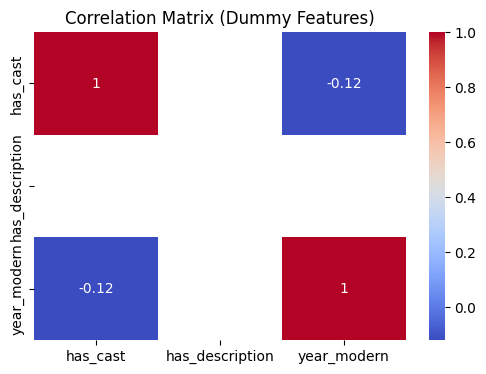

In [6]:

# Create dummy numeric features for demonstration
df['has_cast'] = df['cast'].notnull().astype(int)
df['has_description'] = df['description'].notnull().astype(int)
df['year_modern'] = (df['release_year'] >= 2015).astype(int)

correlation = df[['has_cast', 'has_description', 'year_modern']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Dummy Features)')
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()


## Task 5: Publish-Quality Visual

/tmp/ipython-input-7-4292867978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set2')


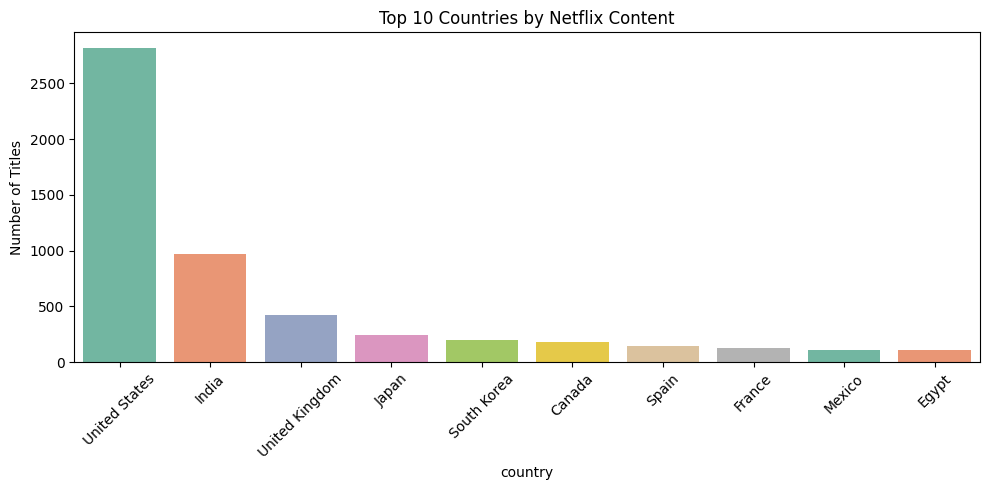

In [7]:

# Bar plot of top 10 countries by content count
plt.figure(figsize=(10,5))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set2')
plt.title('Top 10 Countries by Netflix Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_countries_netflix.png", dpi=300)
plt.show()


In [9]:
from google.colab import files
files.download("netflix_yearly_releases.png")
files.download("duration_vs_year.png")
files.download("rating_distribution.png")
files.download("release_year_by_type.png")
files.download("correlation_heatmap.png")
files.download("top_countries_netflix.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

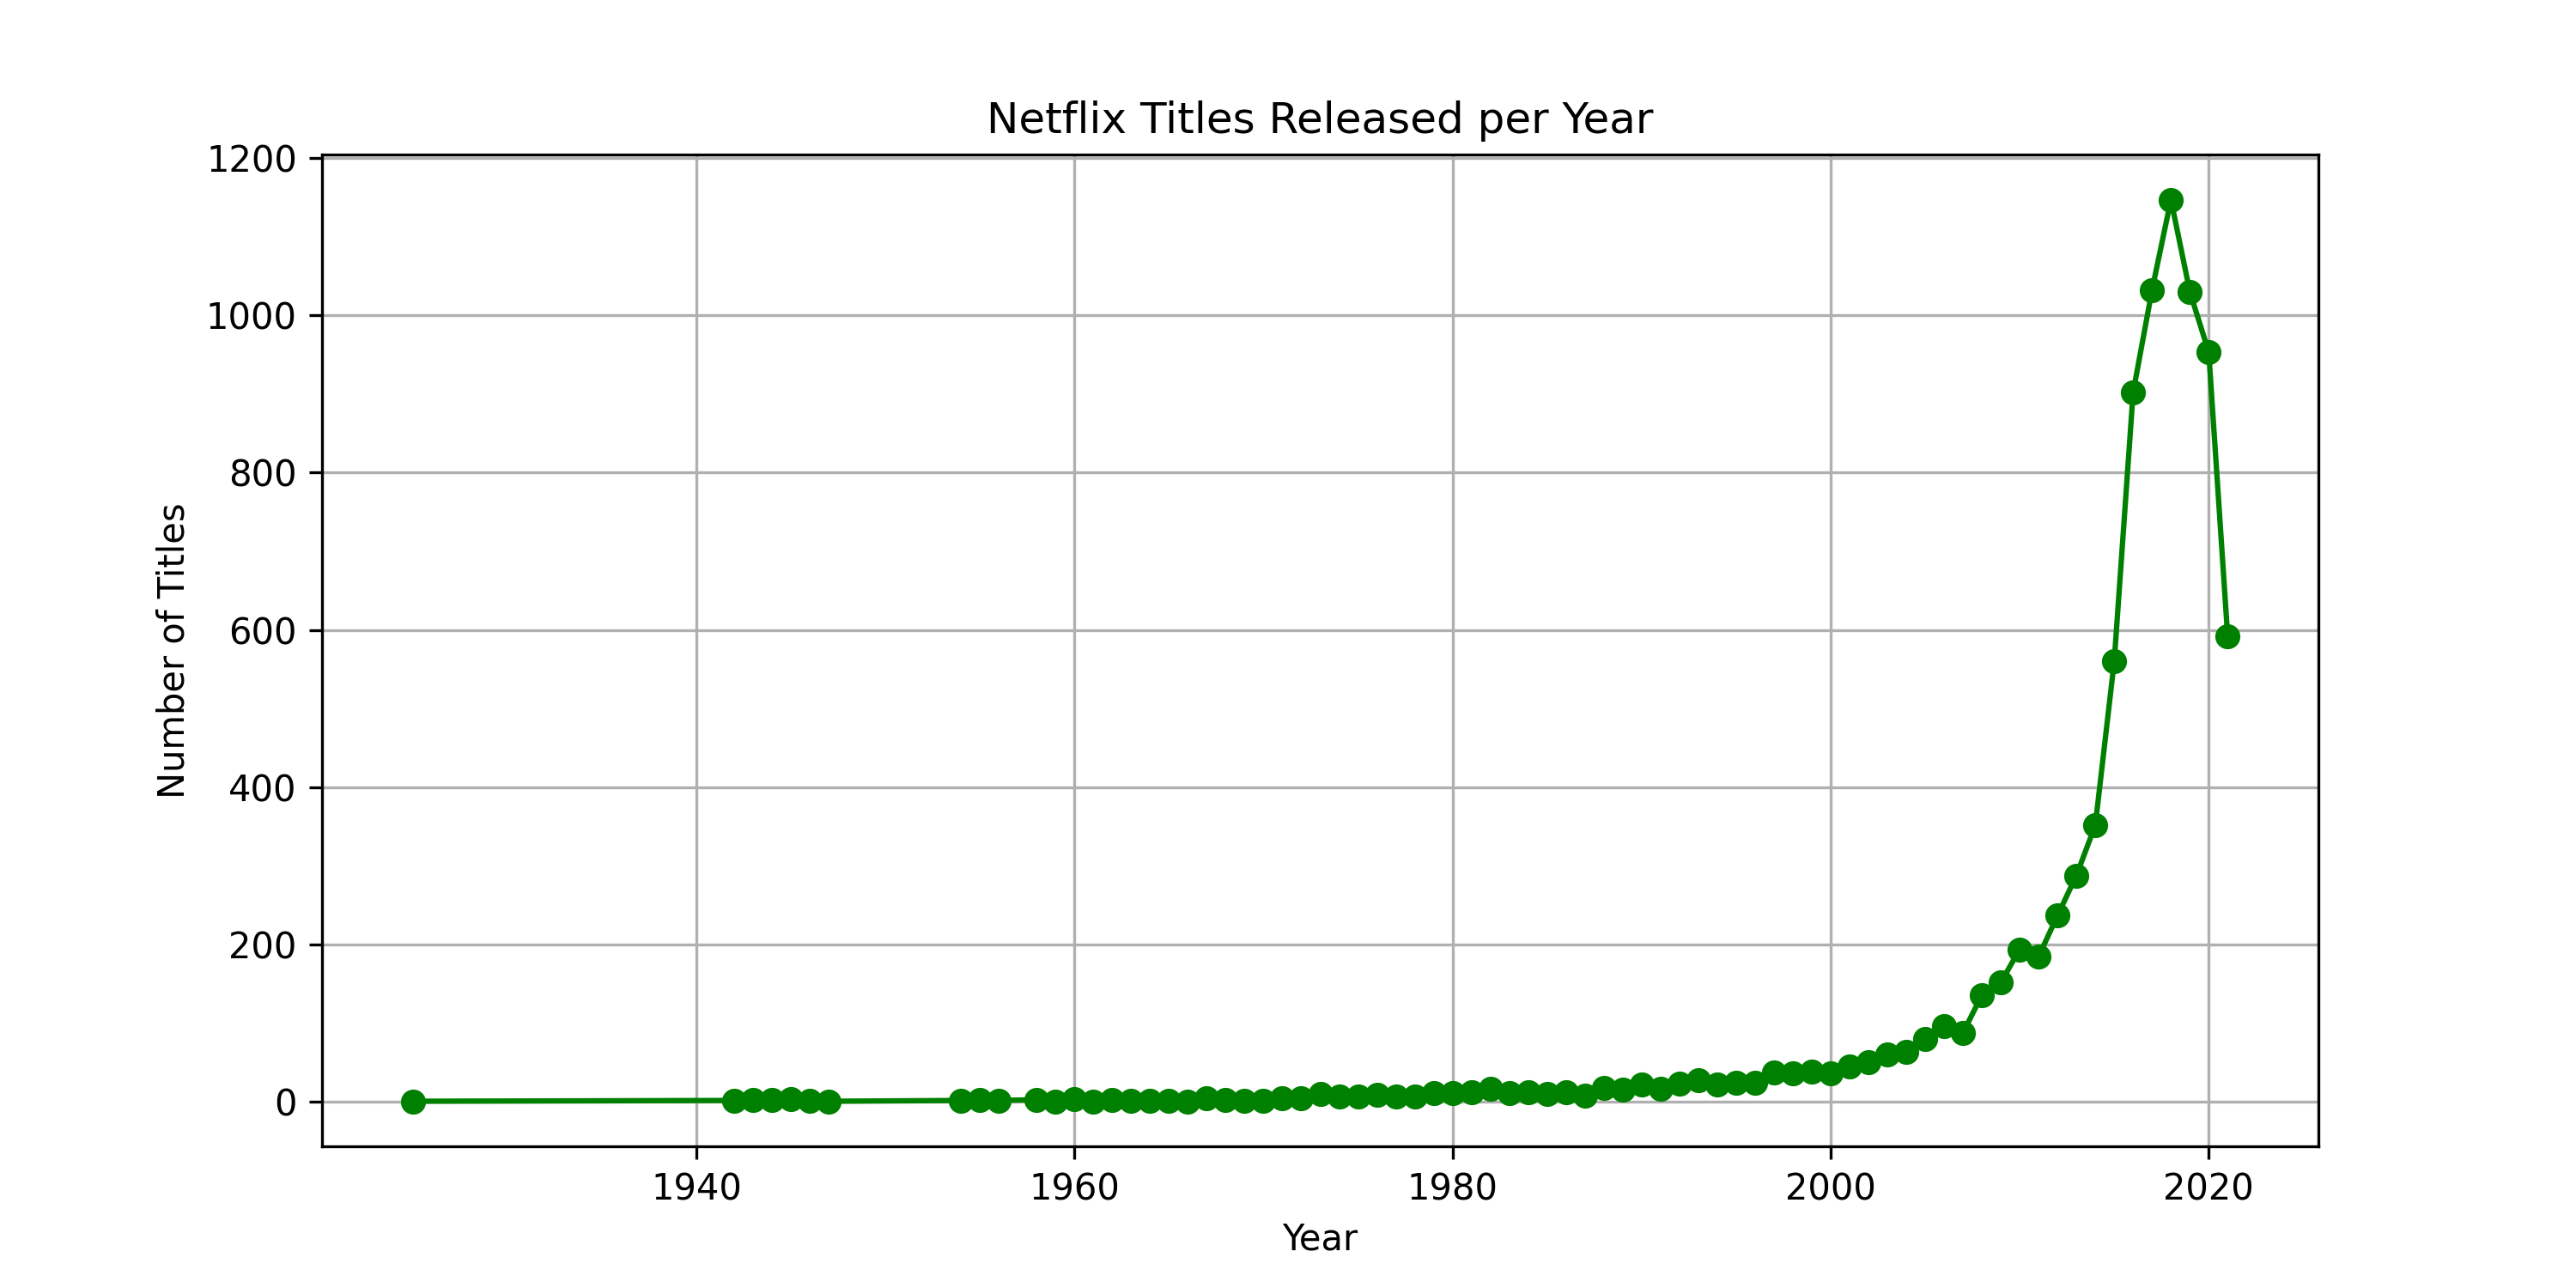

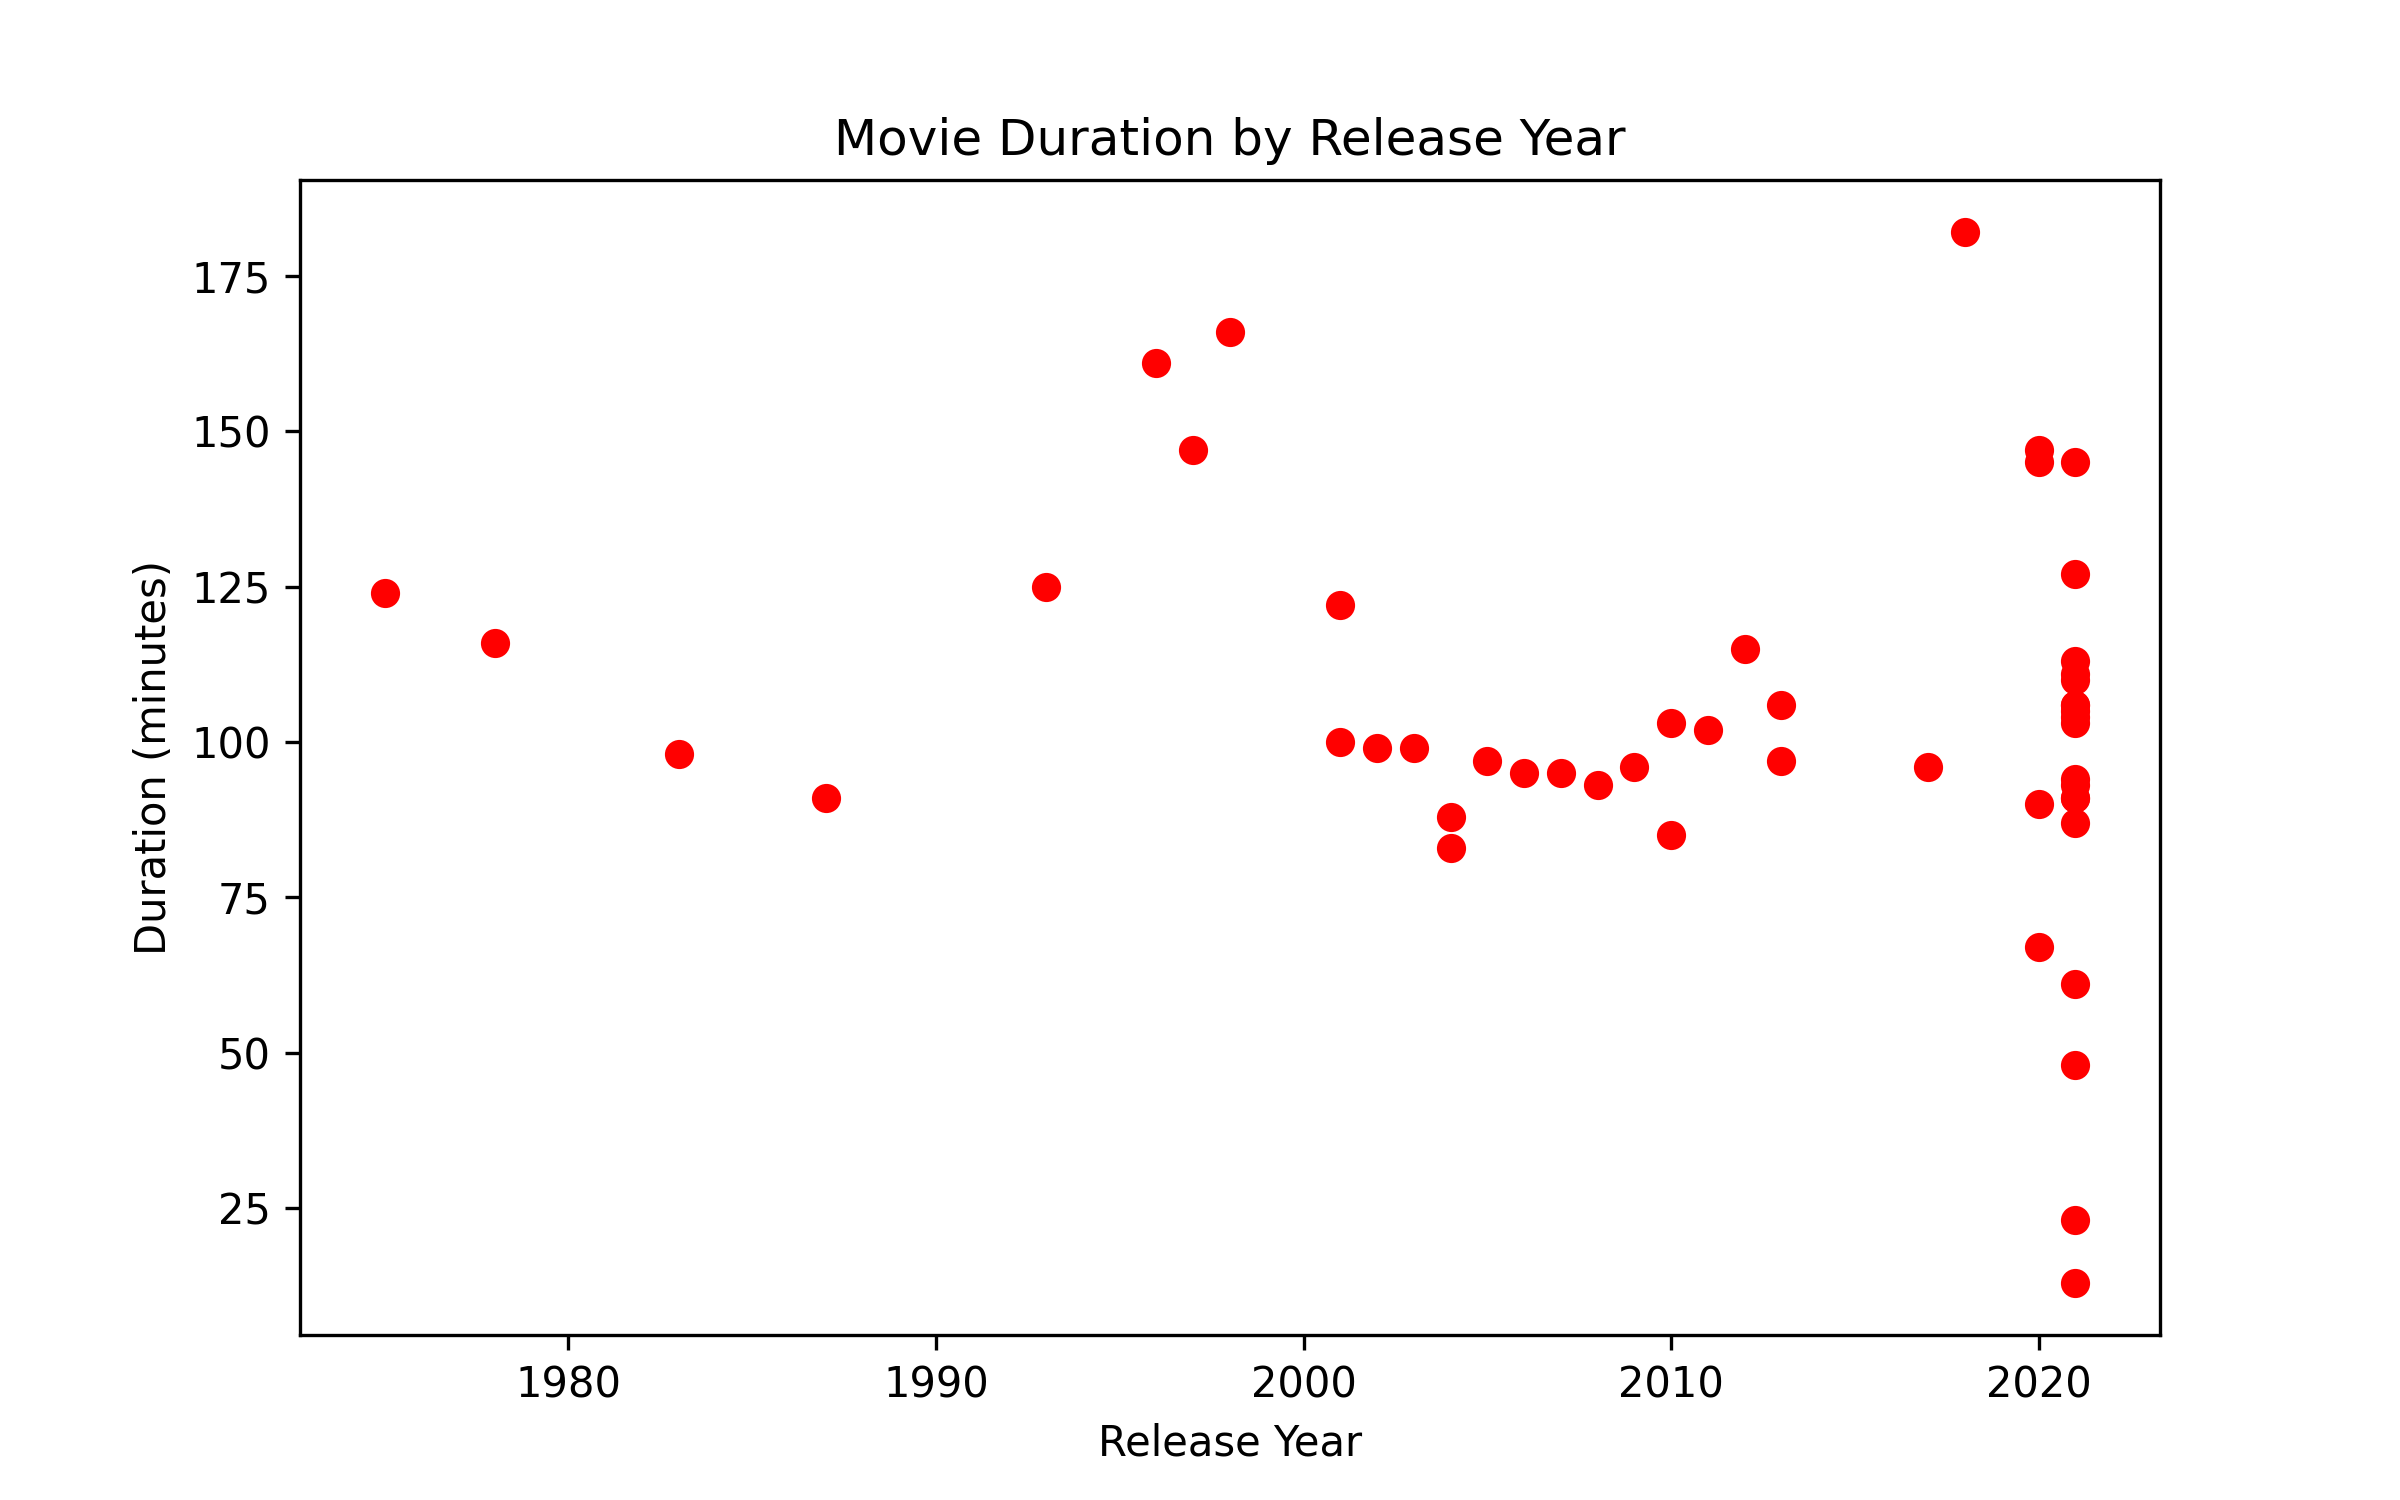

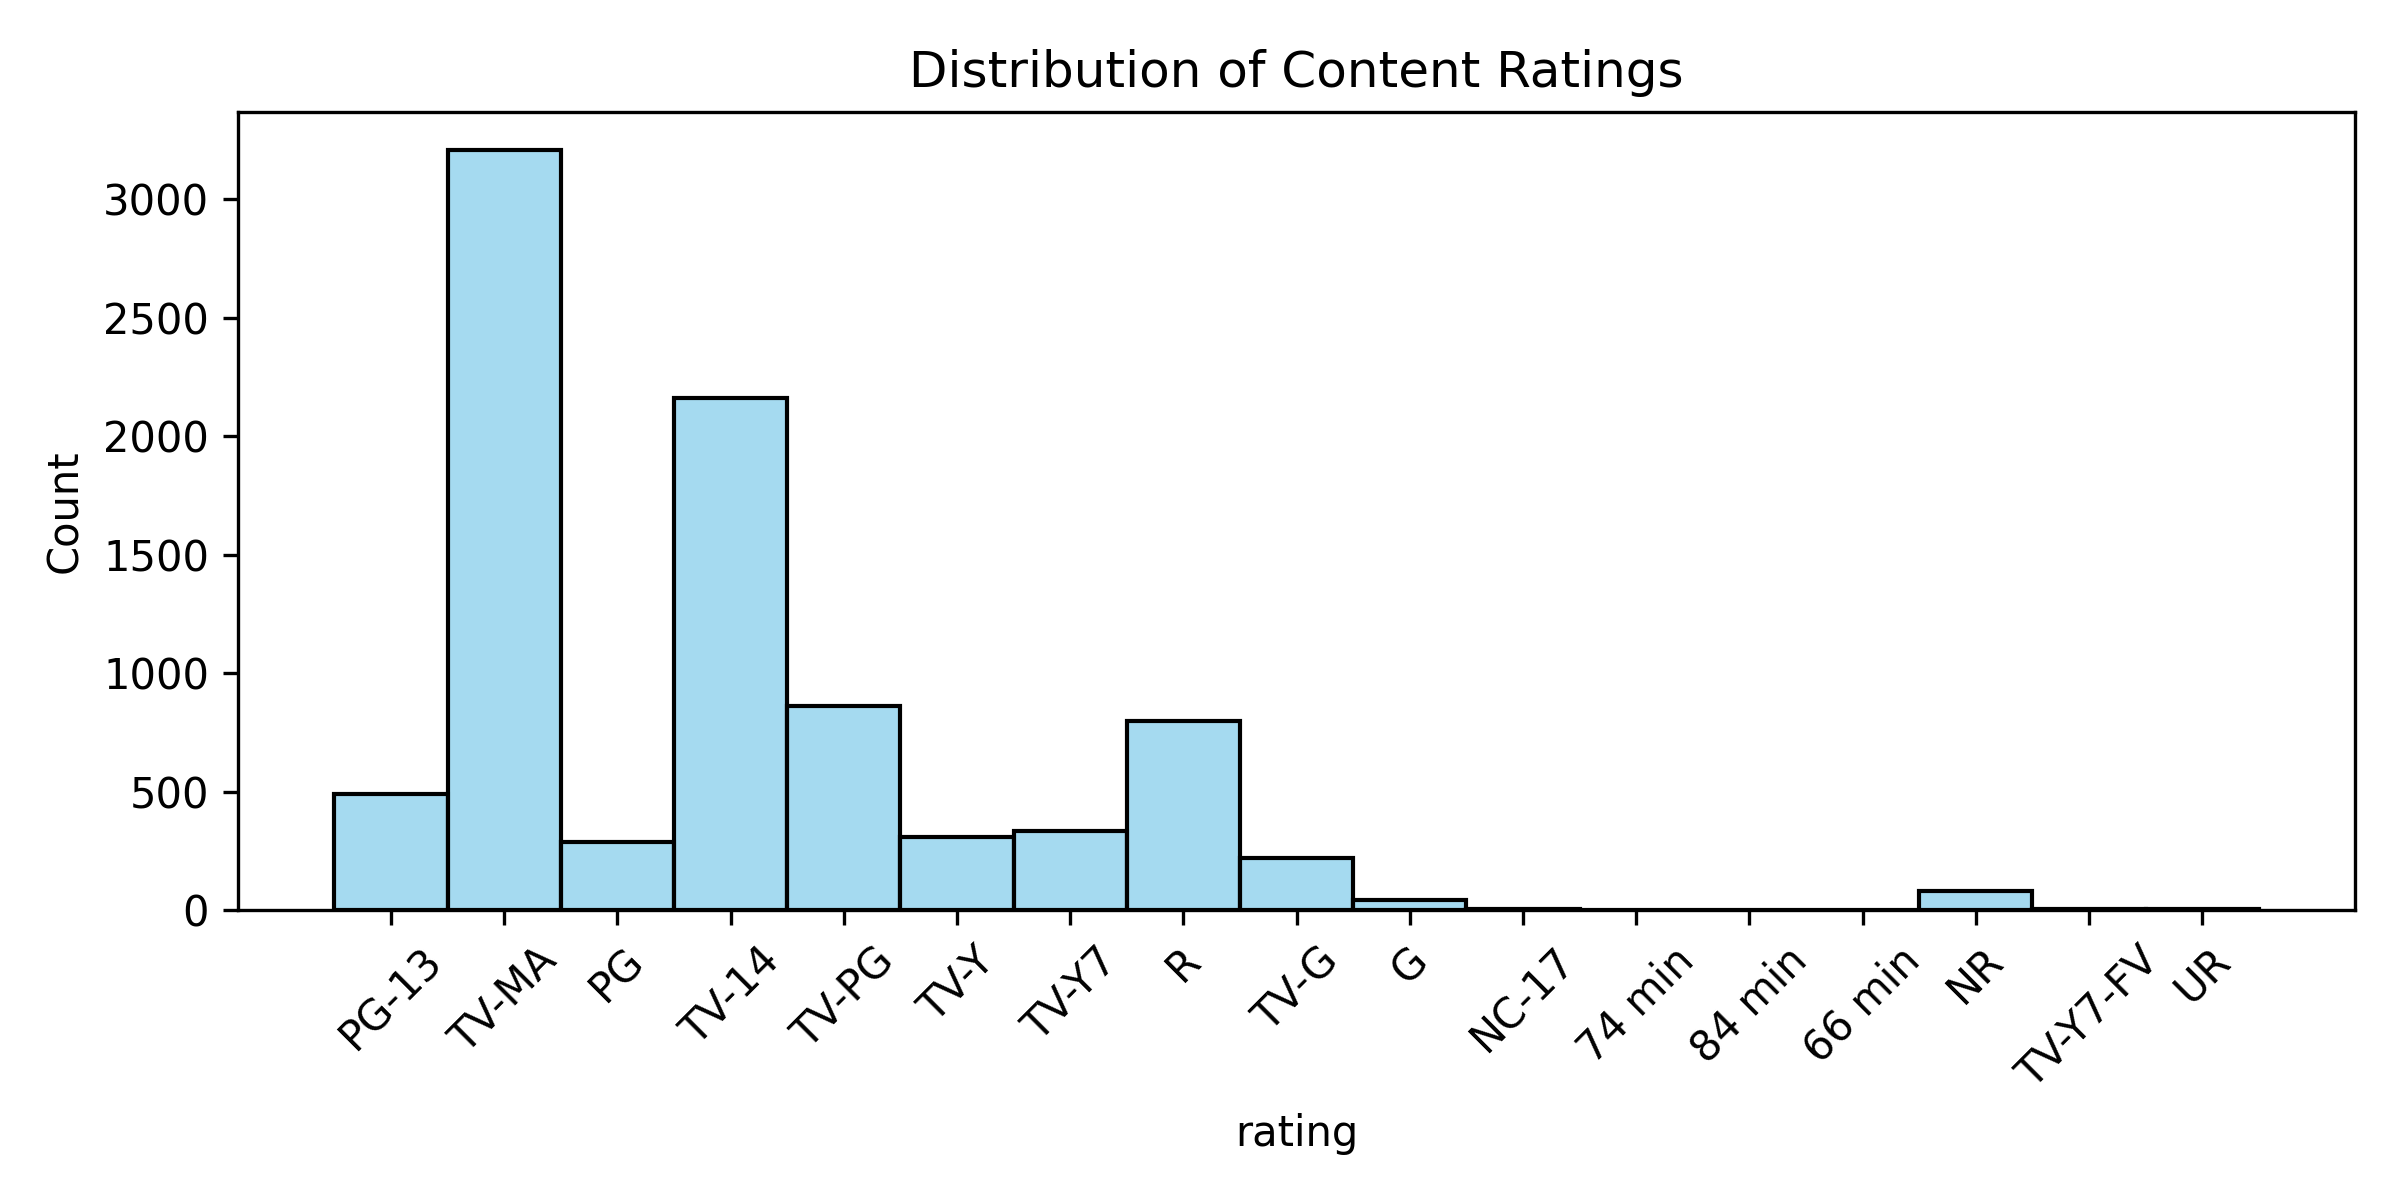

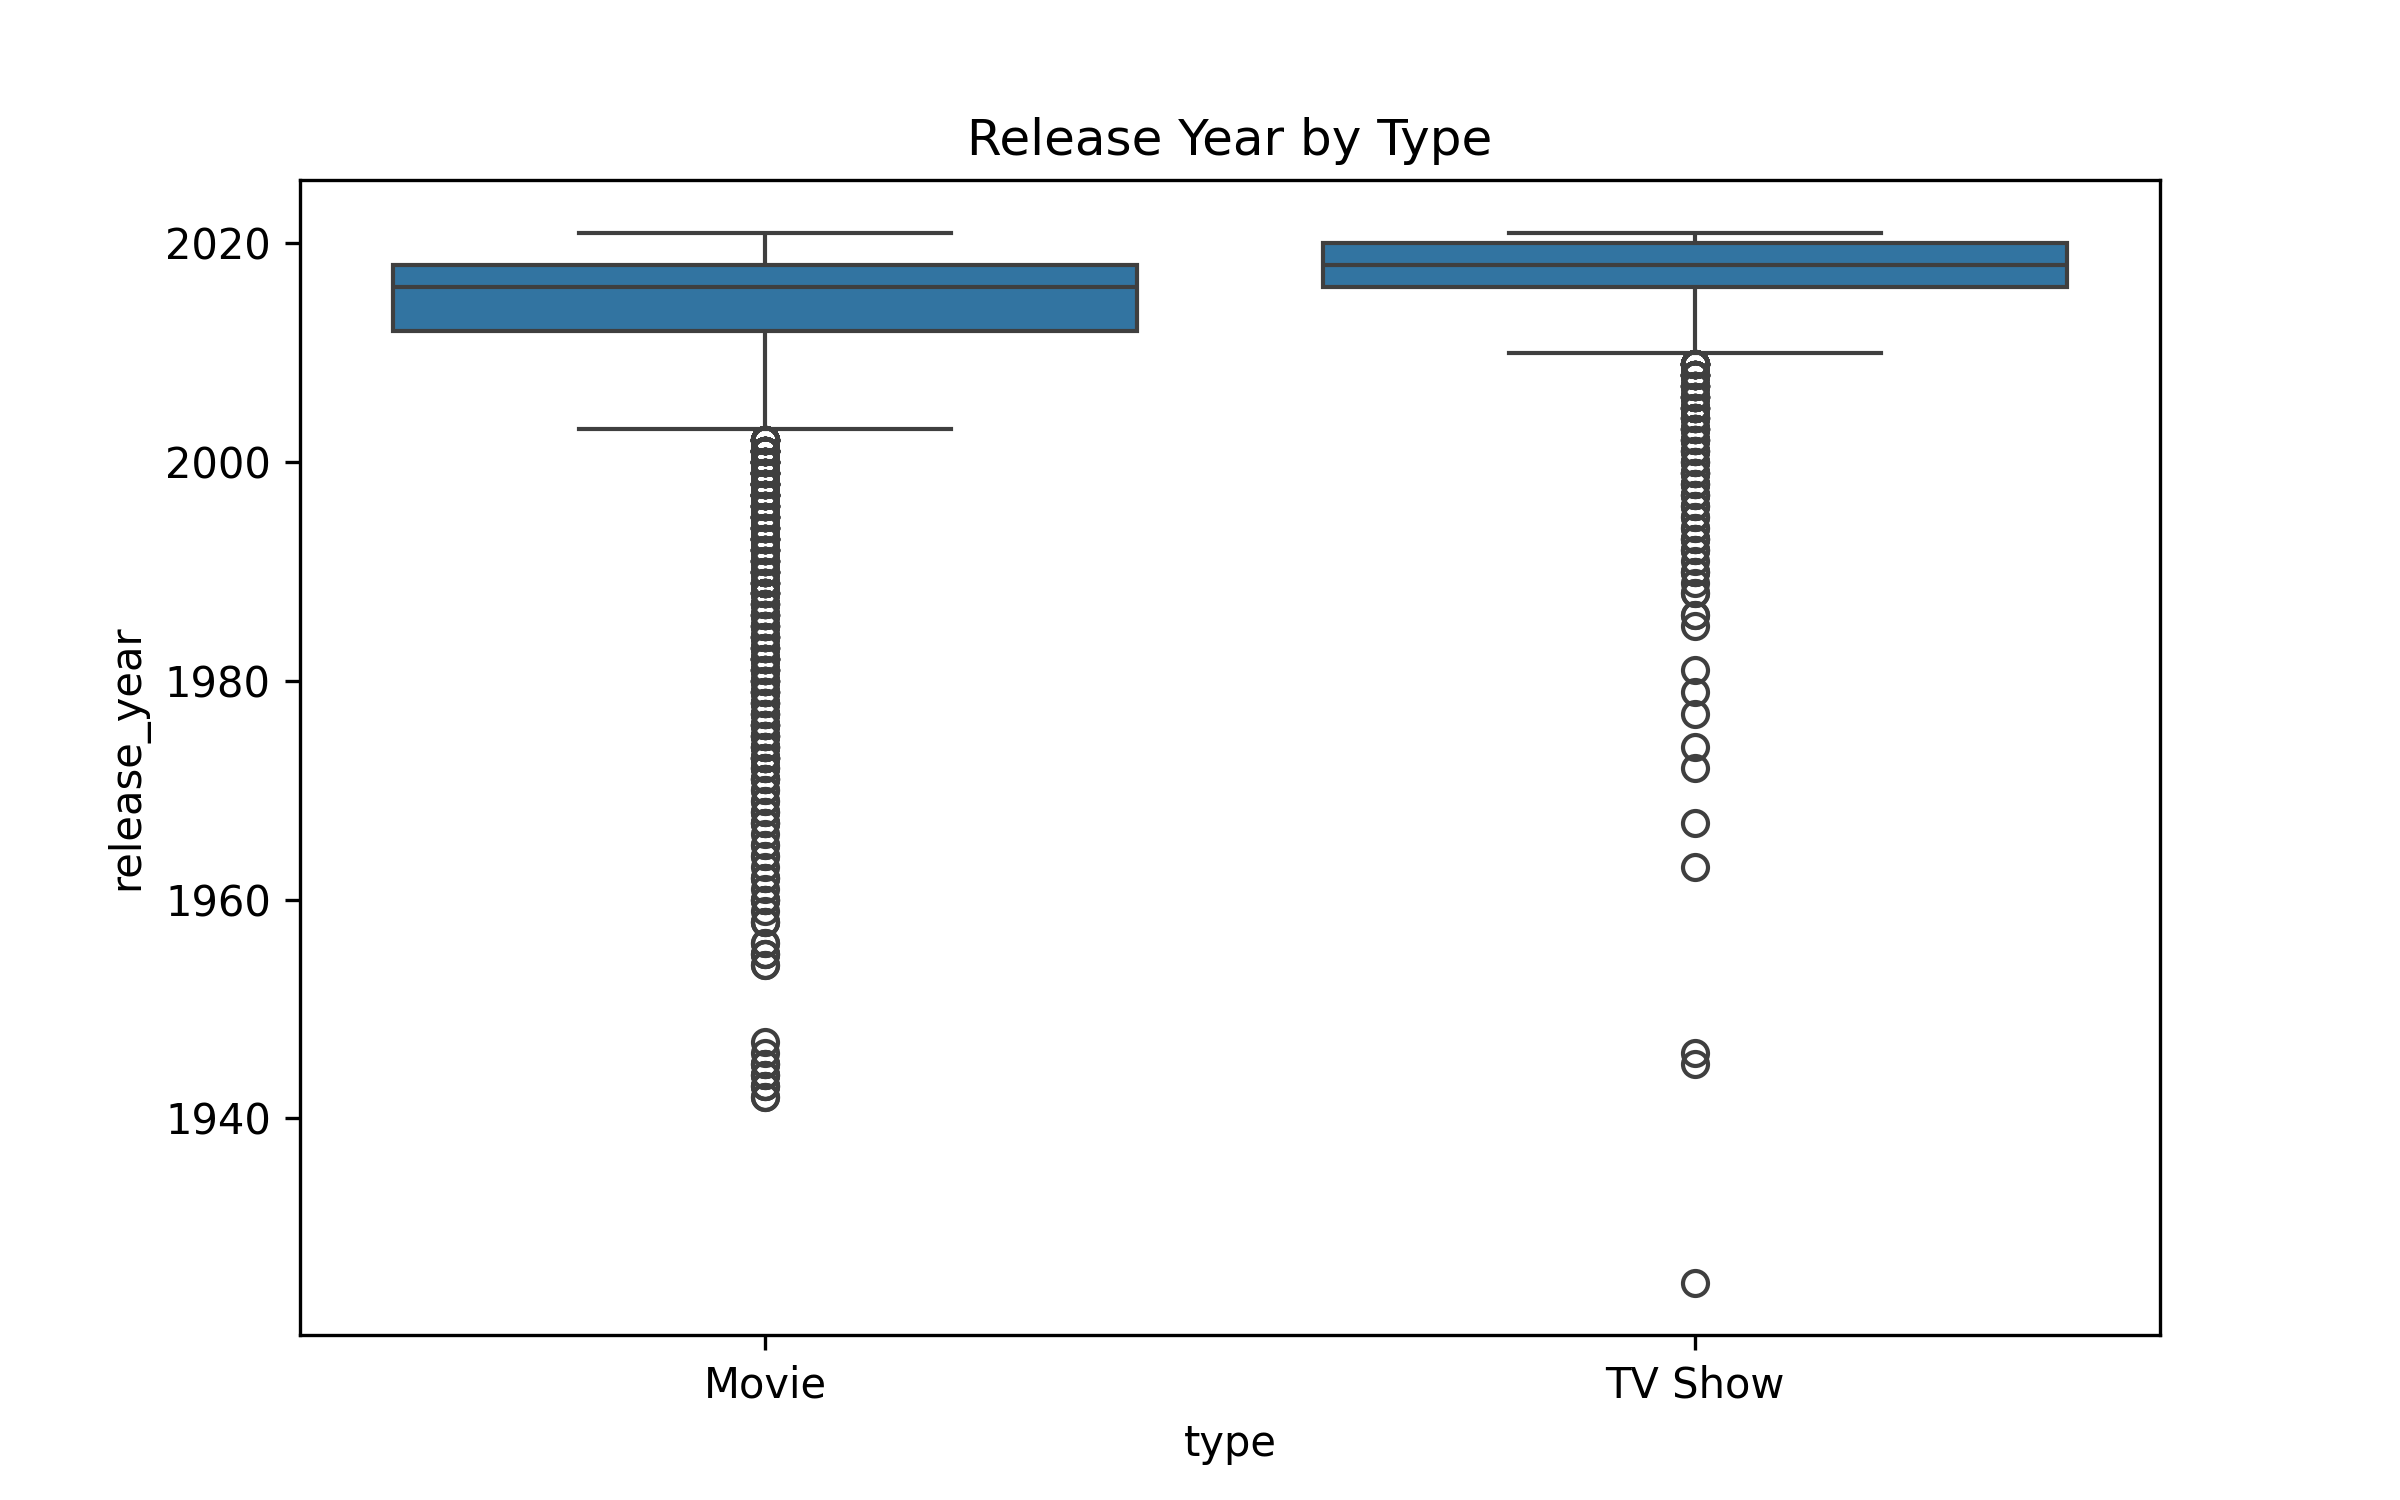

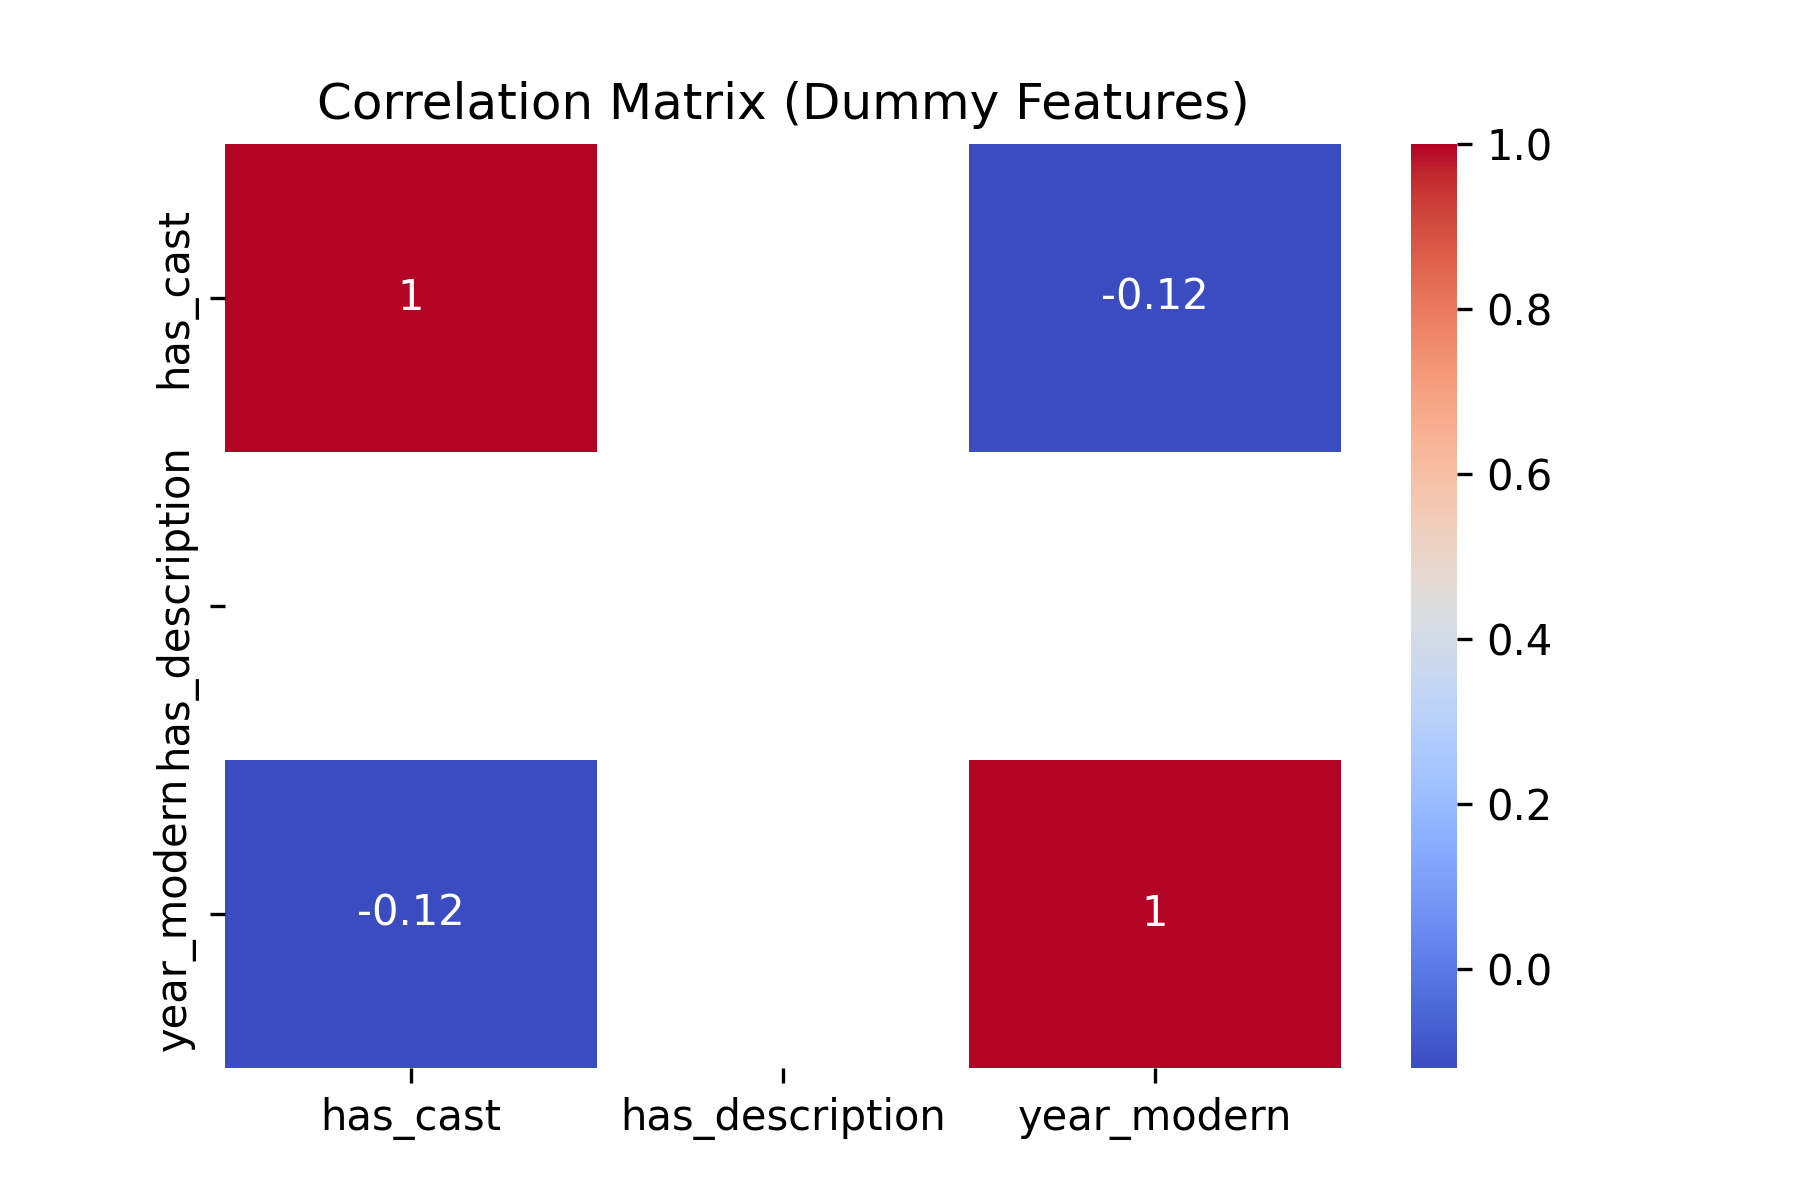

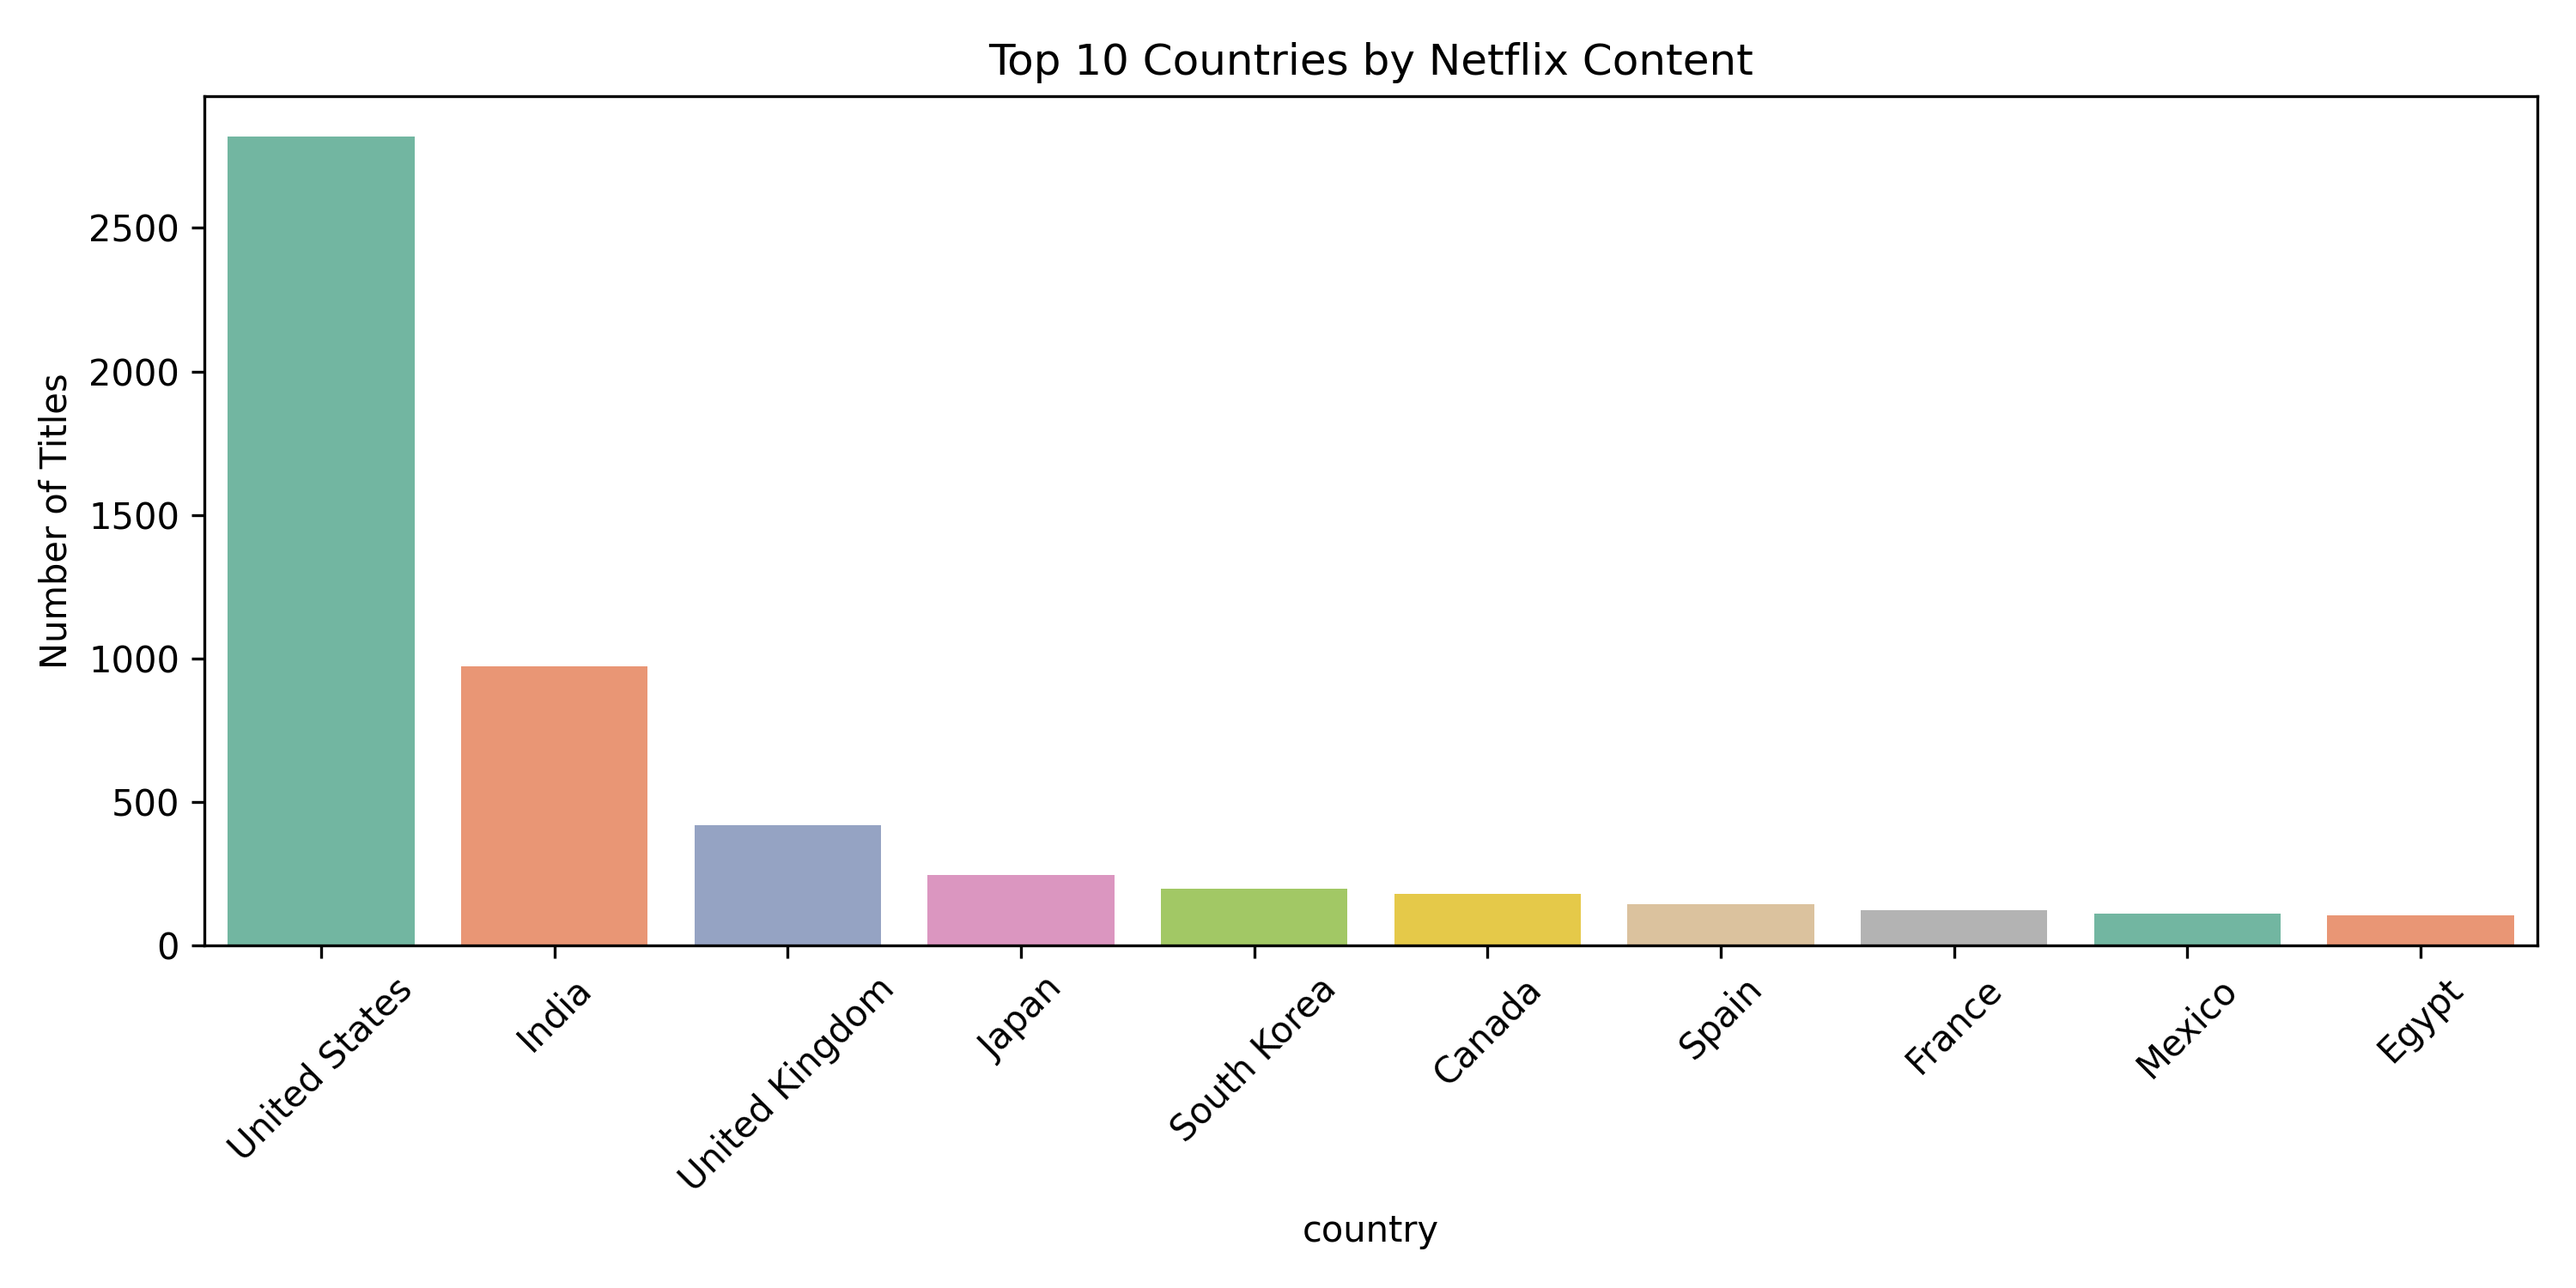

In [10]:
from IPython.display import Image, display

# Load and display all saved plot images
image_files = [
    "netflix_yearly_releases.png",
    "duration_vs_year.png",
    "rating_distribution.png",
    "release_year_by_type.png",
    "correlation_heatmap.png",
    "top_countries_netflix.png"
]

for img_file in image_files:
    display(Image(filename=img_file))
